**Task - 02**

**Sentiment Analysis on Movie Reviews**

Develop a natural language processing (NLP) model to perform
sentiment analysis on movie reviews. The model should classify
reviews as positive or negative.

# Test Preprocessing


1.  Importation




In [39]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Import necessary classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,accuracy_score, precision_score, recall_score, f1_score



2.  mount drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3.  dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/IMBD/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = preprocessing.LabelEncoder()
df['sentiment'] = le.fit_transform(df.sentiment.values)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


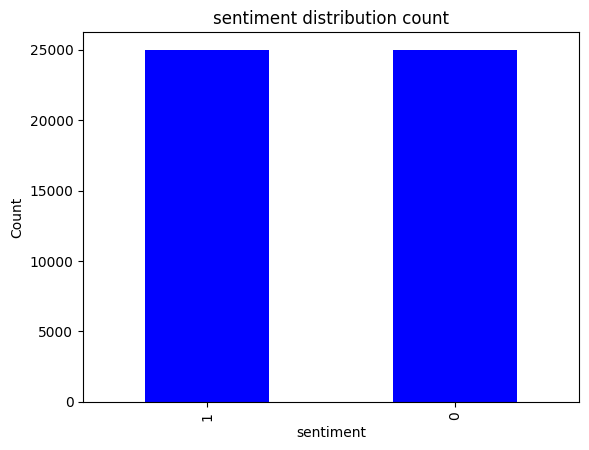

In [5]:
#Bar graph to visualize the total counts of each feedback

df['sentiment'].value_counts().plot.bar(color = 'blue')
plt.title('sentiment distribution count')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='Percentage wise distrubution of sentiment'>

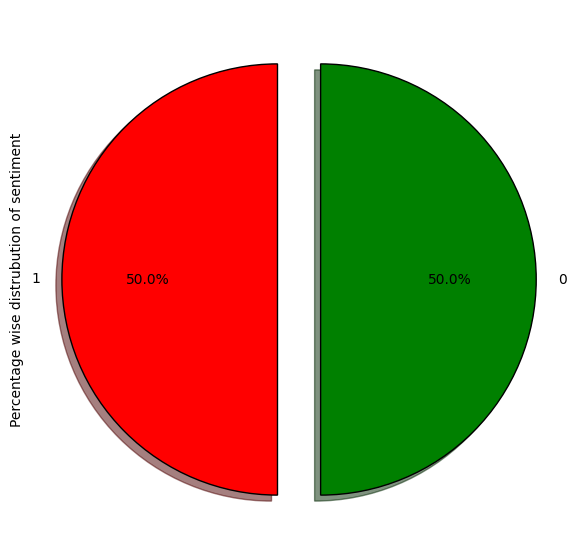

In [6]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['sentiment'].value_counts()/df.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of sentiment')


4.   Lowercasing


In [7]:
df['review'].str.lower()
df['review'] = df['review'].apply(lambda x:x.lower())

5. Removing HTML tags





In [8]:
def remove_html_tags(text):
    pattern = re.compile('\\<.*?\\>')
    return pattern.sub(r'', text)


In [9]:
df['review'] = df['review'].apply(remove_html_tags)
df['review']

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."
...,...
49995,i thought this movie did a down right good job...
49996,"bad plot, bad dialogue, bad acting, idiotic di..."
49997,i am a catholic taught in parochial elementary...
49998,i'm going to have to disagree with the previou...


6.  Remove URLs

URLs are not important in model building. We have to remove URLs.

In [10]:
def remove_url(text):
  pattern = re.compile('https?://S+|www.S+')
  return pattern.sub(r'', text)


In [11]:
df['review'] = df['review'].apply(remove_url)
df['review']

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."
...,...
49995,i thought this movie did a down right good job...
49996,"bad plot, bad dialogue, bad acting, idiotic di..."
49997,i am a catholic taught in parochial elementary...
49998,i'm going to have to disagree with the previou...


7. clean *data*

In [12]:
!pip install contractions



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.9 MB/s eta 0:00:00


In [13]:
# import library
import contractions
# contracted text
def contracted_text(text):
  return contractions.fix(text)

In [14]:
df['review'] = df['review'].apply(contracted_text)
df['review']

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there is a family where a little boy...
4,"petter mattei's ""love in the time of money"" is..."
...,...
49995,i thought this movie did a down right good job...
49996,"bad plot, bad dialogue, bad acting, idiotic di..."
49997,i am a catholic taught in parochial elementary...
49998,i am going to have to disagree with the previo...


8. clean *data*

In [15]:
def clean_data(text_column):

  texts = []
  print(text_column.shape)
  for text in text_column:
    #replace the regular charactere that isn't a-z,A-Z or space with empty space
    pattern = re.sub('[^a-zA-Z ]+', '', text)
    # add the cleanin gtext to texts
    texts.append(pattern)

  return texts


In [16]:
df['clean_review'] = clean_data(df['review'])

data = df[['review', 'clean_review']]
data.head()

(50000,)


,review,clean_review
0,one of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,basically there is a family where a little boy...,basically there is a family where a little boy...
4,"petter mattei's ""love in the time of money"" is...",petter matteis love in the time of money is a ...


9. Chat word Treatment

In [17]:
# Add chat words in form of dictionary
chat_words = {}
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return ' '.join(new_text)

In [18]:
data['clean_review'] = data['clean_review'].apply(chat_conversion)
data['clean_review']

<ipython-input-18-ca8d7cd29db9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_review'] = data['clean_review'].apply(chat_conversion)


,clean_review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...
3,basically there is a family where a little boy...
4,petter matteis love in the time of money is a ...
...,...
49995,i thought this movie did a down right good job...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,i am a catholic taught in parochial elementary...
49998,i am going to have to disagree with the previo...


10. Spelling Correction

In [19]:
def spelling(incorrect_text):
  textblob = TextBlob(incorrect_text)
  return textblob.correct()

In [20]:
#data['clean_review'] = data['clean_review'].apply(spelling)
#data['clean_review']

# Tokenization

In [21]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
data['tokens'] = [word_tokenize(text) for text in data['clean_review'].to_list()]
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,review,clean_review,tokens
0,one of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production. the filming tec...,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,basically there is a family where a little boy...,"[basically, there, is, a, family, where, a, li..."
4,"petter mattei's ""love in the time of money"" is...",petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon..."


# Remove Stop Words
Stop words are only for sentence formation but in the meaning of the sentence, stop words are not important.


In [22]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_word = stopwords.words('english')
stop_word

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
token_without_stopword = []

for tokens in data['tokens'].to_list():
  token_without_stopword.append([word for word in tokens if not word in stop_word])

data['tokens_without_stopword'] = token_without_stopword

data.head()

,review,clean_review,tokens,tokens_without_stopword,stems,lemmas,lemmatized_text
0,one of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis...","[one, review, mention, watch, oz, episod, hook...","[one, reviewer, mentioned, watching, oz, episo...",one reviewer mentioned watching oz episode hoo...
1,a wonderful little production. the filming tec...,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass...","[wonderful, little, production, filming, techn...",wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...","[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...
3,basically there is a family where a little boy...,basically there is a family where a little boy...,"[basically, there, is, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,...","[basic, famili, littl, boy, jake, think, zombi...","[basically, family, little, boy, jake, think, ...",basically family little boy jake think zombie ...
4,"petter mattei's ""love in the time of money"" is...",petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st...","[petter, matteis, love, time, money, visually,...",petter matteis love time money visually stunni...


# Stemming

 Stemming means mapping a group of words to the same stem by removing prefixes or suffixes without giving any value to the “grammatical meaning” of the stem formed after the process.

In [24]:
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [25]:
stemmed_tokens = []

for tokens in data['tokens_without_stopword'].to_list():

  stemmed_tokens_sentence = []

  for token in tokens:
    #stem the token using porter_stemmer tokens for the current sentence
    stemmed_tokens_sentence.append(porter_stemmer.stem(token))

  stemmed_tokens.append(stemmed_tokens_sentence)

data['stems'] = stemmed_tokens

data.head()

,review,clean_review,tokens,tokens_without_stopword,stems
0,one of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis...","[one, review, mention, watch, oz, episod, hook..."
1,a wonderful little production. the filming tec...,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass..."
2,i thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe..."
3,basically there is a family where a little boy...,basically there is a family where a little boy...,"[basically, there, is, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,...","[basic, famili, littl, boy, jake, think, zombi..."
4,"petter mattei's ""love in the time of money"" is...",petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st..."


# Lemmatize

In [26]:
from nltk.stem import WordNetLemmatizer
WordNetLemmatizer = WordNetLemmatizer()

In [27]:
#download the wordNet dataset. It is a large lexical database of English words
nltk.download('wordnet')

#download the open multilingual wordNet
nltk.download("omw-1.4")

lemmas = []

for tokens in data['tokens_without_stopword'].to_list():

  lemmtized_tokens_sentence = []

  for token in tokens:
    #lemmas the token using WordNetLemmatizer tokens for the current sentence
     lemmtized_tokens_sentence.append(WordNetLemmatizer.lemmatize(token))

  lemmas.append(lemmtized_tokens_sentence)

data['lemmas'] = lemmas

data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,review,clean_review,tokens,tokens_without_stopword,stems,lemmas
0,one of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis...","[one, review, mention, watch, oz, episod, hook...","[one, reviewer, mentioned, watching, oz, episo..."
1,a wonderful little production. the filming tec...,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass...","[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...","[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,basically there is a family where a little boy...,"[basically, there, is, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,...","[basic, famili, littl, boy, jake, think, zombi...","[basically, family, little, boy, jake, think, ..."
4,"petter mattei's ""love in the time of money"" is...",petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st...","[petter, matteis, love, time, money, visually,..."


In [29]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.review)

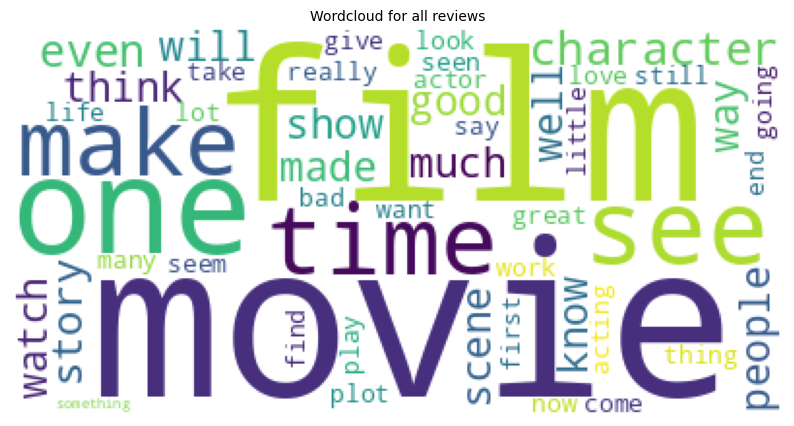

In [30]:
# Combine all reviews
reviews = " ".join([review for review in data['review']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [31]:
data.head()

,review,clean_review,tokens,tokens_without_stopword,stems,lemmas
0,one of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis...","[one, review, mention, watch, oz, episod, hook...","[one, reviewer, mentioned, watching, oz, episo..."
1,a wonderful little production. the filming tec...,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass...","[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...","[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,basically there is a family where a little boy...,"[basically, there, is, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,...","[basic, famili, littl, boy, jake, think, zombi...","[basically, family, little, boy, jake, think, ..."
4,"petter mattei's ""love in the time of money"" is...",petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st...","[petter, matteis, love, time, money, visually,..."


In [34]:
# Join lemmatized tokens back into sentences
data['lemmatized_text'] = data['lemmas'].apply(lambda x: ' '.join(x))
data['lemmatized_text']

,lemmatized_text
0,one reviewer mentioned watching oz episode hoo...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically family little boy jake think zombie ...
4,petter matteis love time money visually stunni...
...,...
49995,thought movie right good job creative original...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary school nu...
49998,going disagree previous comment side maltin on...


In [40]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the lemmatized text
X = vectorizer.fit_transform(data['lemmatized_text'])
y = df['sentiment'].values

In [41]:

seed = 1111
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del X_, y_

print(f"The shape of the training set (input) is: {X_train.shape}")
print(f"The shape of the training set (target) is: {y_train.shape}\n")
print(f"The shape of the cross validation set (input) is: {X_cv.shape}")
print(f"The shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"The shape of the test set (input) is: {X_test.shape}")
print(f"The shape of the test set (target) is: {y_test.shape}")

The shape of the training set (input) is: (30000, 202206)
The shape of the training set (target) is: (30000,)

The shape of the cross validation set (input) is: (10000, 202206)
The shape of the cross validation set (target) is: (10000,)

The shape of the test set (input) is: (10000, 202206)
The shape of the test set (target) is: (10000,)


Using StandardScaler after TF-IDF vectorization, ensure you specify with_mean=False

In [43]:
# Initialize the class
scaler_linear = StandardScaler(with_mean=False)

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(X_train)

In [44]:

# Initialize classification models

logistic_regression = LogisticRegression()
rand_forest_classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classification models

logistic_regression = logistic_regression.fit(X_train_scaled, y_train)
rand_forest_classifier = rand_forest_classifier.fit(X_train_scaled, y_train)


In [45]:

def metrics(X_scaled, y_):

    # Initialization of dictionary to store results for classification metrics
    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

    # List of models and their names
    models = [

        (logistic_regression, 'Logistic Regression'),
        (rand_forest_classifier, 'Random Forest Classifier')
    ]

    # Loop over models
    for model, model_name in models:
        # Prediction on the test set
        y_pred = model.predict(X_scaled)
        #Confusion Matrix
        cm = confusion_matrix(y_, y_pred)
        print(cm)
        cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logistic_regression.classes_)
        cm_display.plot()
        plt.show()
        # Calculation of classification metrics
        accuracy = accuracy_score(y_, y_pred)
        precision = precision_score(y_, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
        recall = recall_score(y_, y_pred, average='weighted')
        f1 = f1_score(y_, y_pred, average='weighted')

        # Add results to the dictionary
        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1 Score'].append(f1)

      # Conversion of the results dictionary to a DataFrame for better visualization
    results_df = pd.DataFrame(results)

      # Print the results DataFrame
    print(results_df)

In [46]:
X_train_scaled = scaler_linear.fit_transform(X_train)

[[14976     0]
 [    0 15024]]


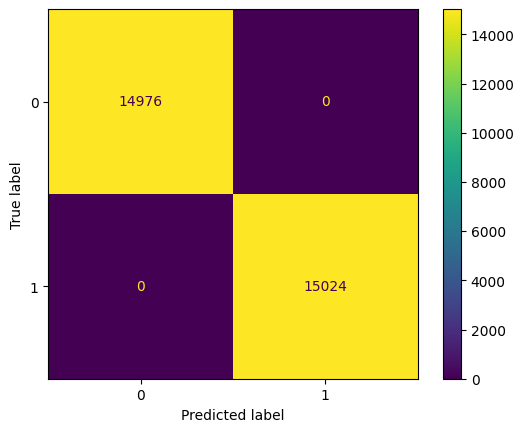

[[10657  4319]
 [ 2093 12931]]


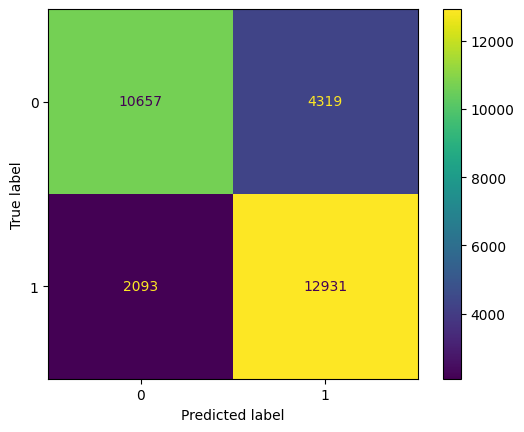

                      Model  Accuracy  Precision    Recall  F1 Score
0       Logistic Regression  1.000000   1.000000  1.000000  1.000000
1  Random Forest Classifier  0.786267   0.792664  0.786267  0.785058


In [47]:
metrics(X_train_scaled,y_train)

In [49]:
X_cv_scaled = scaler_linear.fit_transform(X_cv)



[[4359  636]
 [ 664 4341]]


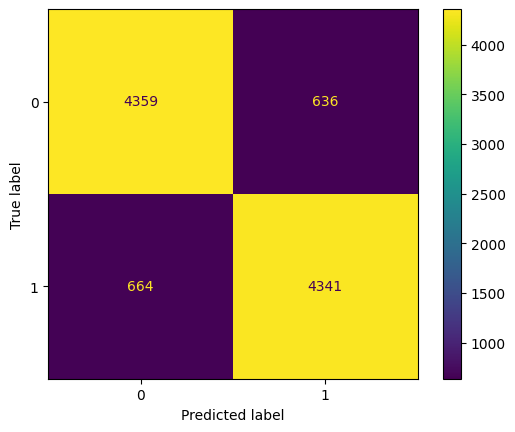

[[3430 1565]
 [ 763 4242]]


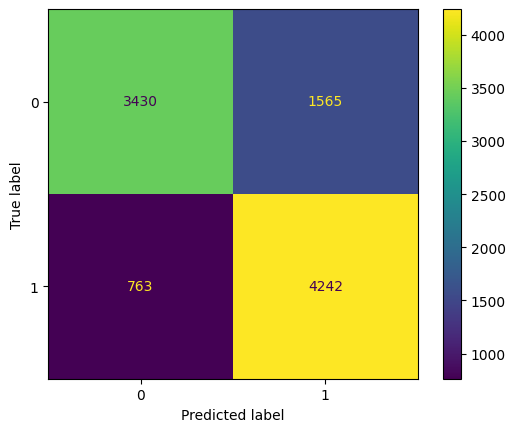

                      Model  Accuracy  Precision  Recall  F1 Score
0       Logistic Regression    0.8700   0.870012  0.8700  0.869999
1  Random Forest Classifier    0.7672   0.774220  0.7672  0.765674


In [50]:
metrics(X_cv_scaled,y_cv)

In [51]:
X_test_scaled = scaler_linear.fit_transform(X_test)



[[4368  661]
 [ 588 4383]]


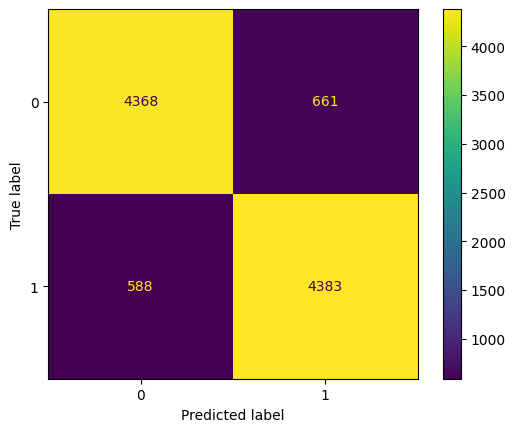

[[3533 1496]
 [ 705 4266]]


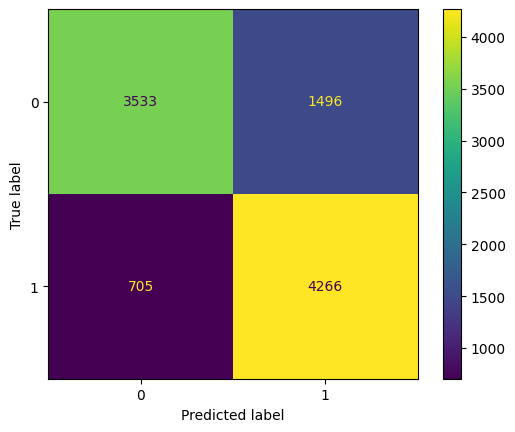

                      Model  Accuracy  Precision  Recall  F1 Score
0       Logistic Regression    0.8751   0.875191  0.8751  0.875099
1  Random Forest Classifier    0.7799   0.787278  0.7799  0.778617


In [52]:
metrics(X_test_scaled,y_test)